# Time Series Analysis
## AR and MA Models

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

#### Flights dataset

In [2]:
# Loading and prepare the data
flights = sns.load_dataset('flights')
flights['date'] = pd.to_datetime(flights['year'].astype(str) + flights['month'].astype(str), format='%Y%b')

# make time series stationary
flights['log_passengers'] = np.log(flights['passengers'])
flights['log_passengers_diff'] = flights.log_passengers.diff().diff(periods=12)
flights = flights.set_index('date')[['log_passengers_diff']].dropna()
flights

,log_passengers_diff
date,
1950-02-01,0.039164
1950-03-01,0.000361
1950-04-01,-0.020496
1950-05-01,-0.012939
1950-06-01,0.066148
...,...
1960-08-01,-0.045934
1960-09-01,0.012024
1960-10-01,0.031830


### AR model

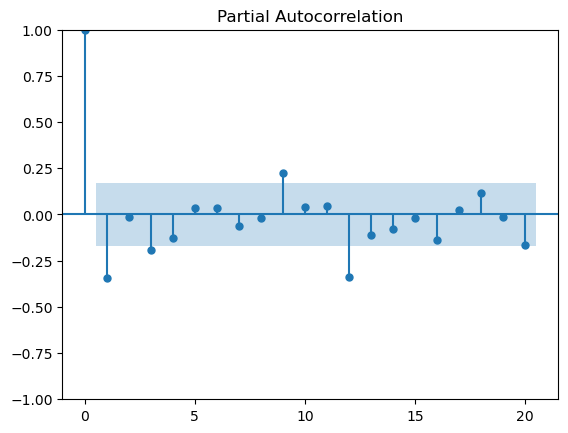

In [3]:
# PACF plot
plot_pacf(flights, lags=20)
plt.show()

In [4]:
# Fit an AR(1) model to the time series
flightsAR1 = AutoReg(flights.log_passengers_diff, lags=1).fit()
print(flightsAR1.summary())

                             AutoReg Model Results                             
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                      AutoReg(1)   Log Likelihood                 224.707
Method:                Conditional MLE   S.D. of innovations              0.043
Date:                 Fri, 12 Sep 2025   AIC                           -443.415
Time:                         13:22:37   BIC                           -434.812
Sample:                     03-01-1950   HQIC                          -439.919
                          - 12-01-1960                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0001      0.004      0.031      0.975      -0.007       0.008
log_passengers_diff.L1    -0.3412      0.082     -4.151      0.000      -0.502      -0.

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Model Diagnostics

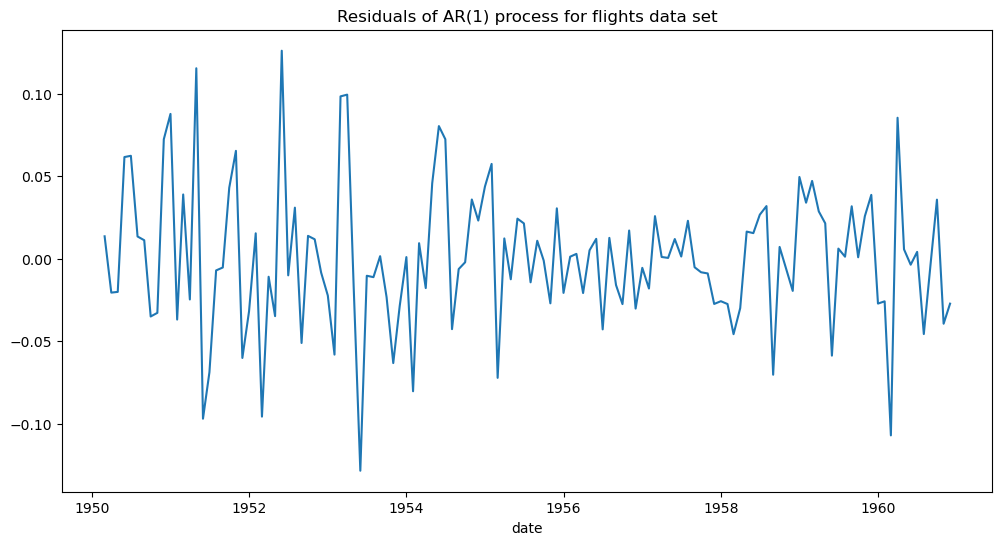

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(flightsAR1.resid)
plt.title('Residuals of AR(1) process for flights data set')
plt.show()

ACF and PACF of residuals to check if they resemble white noise

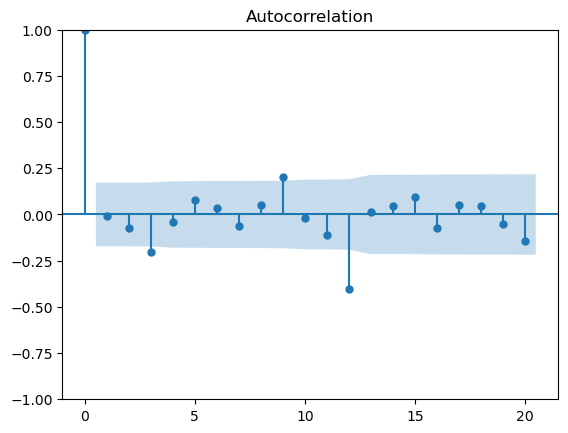

In [6]:
plot_acf(flightsAR1.resid, lags=20)
plt.show()

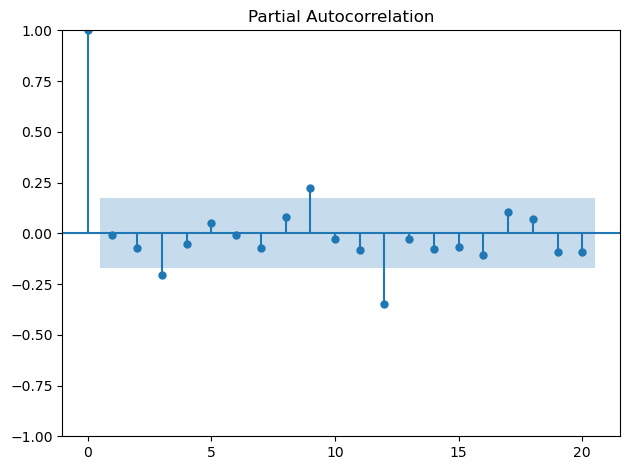

In [7]:
plot_pacf(flightsAR1.resid, lags=20)
plt.tight_layout()
plt.show()

Some of the correlations are differ significantly from zero. The model fit is not perfect.

In [8]:
# Ljung-Box test of autocorrelation in residuals
acorr_ljungbox(flightsAR1.resid)

,lb_stat,lb_pvalue
1,0.006264,0.936916
2,0.755102,0.685538
3,6.381675,0.094448
4,6.597498,0.158750
5,7.481653,0.187212
6,7.671449,0.263175
7,8.189094,0.316216
8,8.565238,0.380287
9,14.281608,0.112655
10,14.322196,0.158796


The p-values are > 0.05. The test therefore gives us no reason to assume that the residuals are not independent.

### MA model

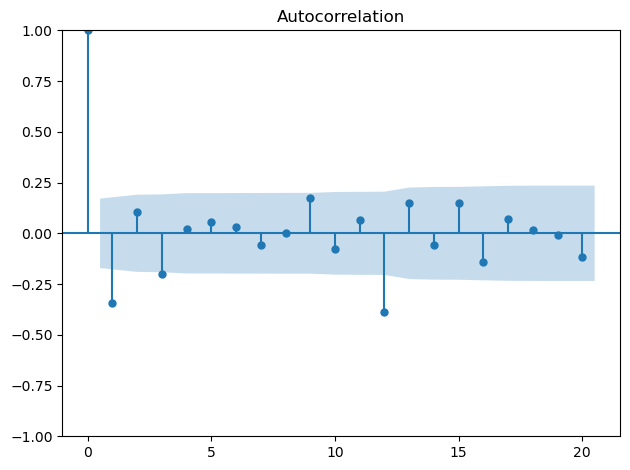

In [9]:
# ACF Plot
plot_acf(flights, lags=20)
plt.tight_layout()
plt.savefig('flights_acf.png', transparent=True)
plt.show()

In [10]:
# Fit an MA(12) Model (the order of the MA part of the ARIMA is the 3. component in the order argument)
flightsMA12 = ARIMA(flights.log_passengers_diff, order=(0, 0, 12)).fit()
print(flightsMA12.summary())

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                 ARIMA(0, 0, 12)   Log Likelihood                 249.944
Date:                 Fri, 12 Sep 2025   AIC                           -471.887
Time:                         13:22:40   BIC                           -431.635
Sample:                     02-01-1950   HQIC                          -455.531
                          - 12-01-1960                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.499      0.617      -0.002       0.001
ma.L1         -0.2977      0.164     -1.818      0.069      -0.619       0.023
ma.L2          0.0039      0.159      0.024 

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Diagnostics

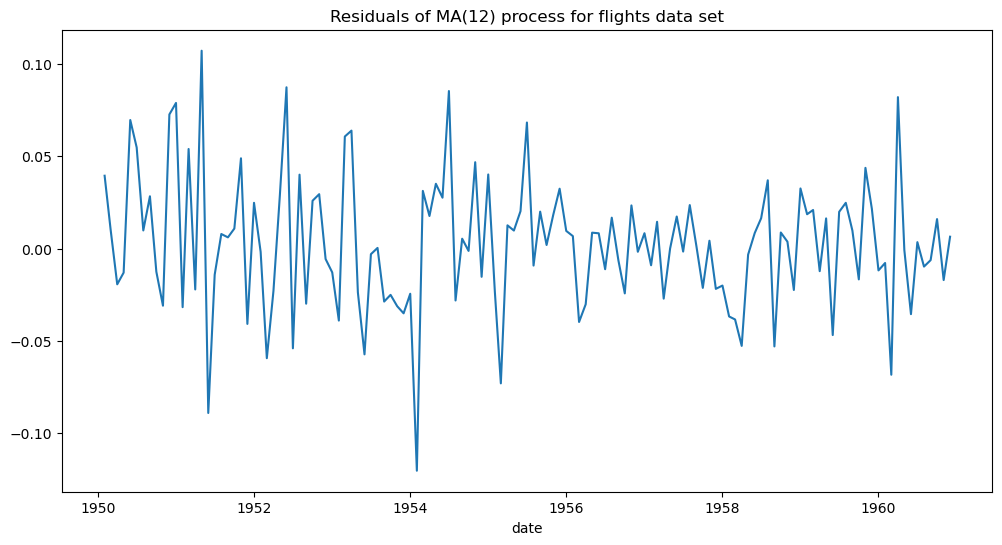

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(flightsMA12.resid)
plt.title('Residuals of MA(12) process for flights data set')
plt.show()

ACF and PACF of residuals to check if they resemble white noise

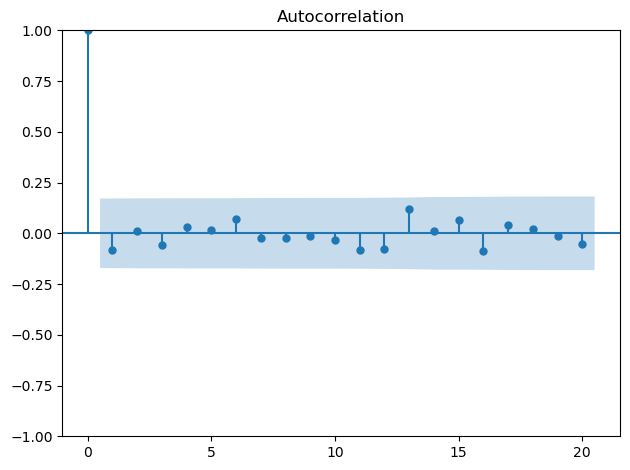

In [12]:
plot_acf(flightsMA12.resid, lags=20)
plt.tight_layout()
plt.savefig('flightsMA12_resid_acf.png', transparent=True)
plt.show()

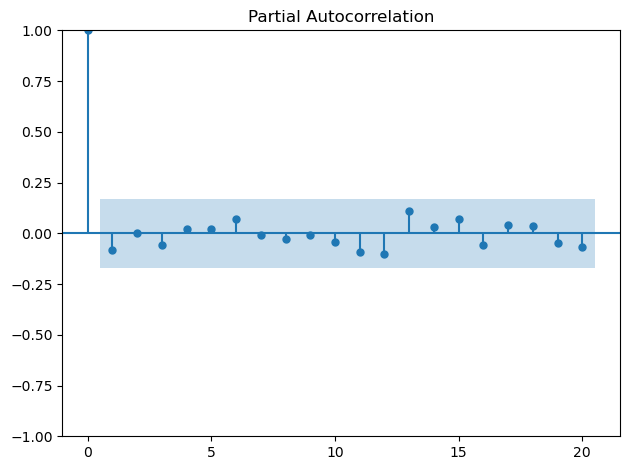

In [13]:
plot_pacf(flightsMA12.resid, lags=20)
plt.tight_layout()
plt.savefig('flightsMA12_resid_pacf.png', transparent=True)
plt.show()

The residuals of the MA(12) model look better than those of the AR(1) model

In [14]:
# Ljung-Box test of autocorrelation in residuals
acorr_ljungbox(flightsMA12.resid)

,lb_stat,lb_pvalue
1,0.923209,0.336634
2,0.935318,0.626467
3,1.381670,0.709837
4,1.515793,0.823840
5,1.543575,0.907987
6,2.226988,0.897684
7,2.310993,0.940645
8,2.393139,0.966528
9,2.415851,0.983062
10,2.596639,0.989391


The p-values are > 0.05. The test therefore gives us no reason to assume that the residuals are not independent.

## Model selection with AIC

In [15]:
# Fit an AR(3) model to the time series
flightsAR3 = AutoReg(flights.log_passengers_diff, lags=3).fit()
print(flightsAR3.summary())

                             AutoReg Model Results                             
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                      AutoReg(3)   Log Likelihood                 222.871
Method:                Conditional MLE   S.D. of innovations              0.042
Date:                 Fri, 12 Sep 2025   AIC                           -435.742
Time:                         13:22:41   BIC                           -421.482
Sample:                     05-01-1950   HQIC                          -429.948
                          - 12-01-1960                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0003      0.004      0.082      0.934      -0.007       0.008
log_passengers_diff.L1    -0.3495      0.087     -4.028      0.000      -0.520      -0.

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
# Fit an AR(12) model to the time series
flightsAR12 = AutoReg(flights.log_passengers_diff, lags=12).fit()
print(flightsAR12.summary())

                             AutoReg Model Results                             
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                     AutoReg(12)   Log Likelihood                 224.653
Method:                Conditional MLE   S.D. of innovations              0.037
Date:                 Fri, 12 Sep 2025   AIC                           -421.305
Time:                         13:22:41   BIC                           -382.398
Sample:                     02-01-1951   HQIC                          -405.506
                          - 12-01-1960                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0012      0.003     -0.366      0.714      -0.008       0.005
log_passengers_diff.L1     -0.3997      0.083     -4.835      0.000      -0.562     

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
# Fit an MA(1) Model (the order of the MA part of the ARIMA is the 3. component in the order argument)
flightsMA1 = ARIMA(flights.log_passengers_diff, order=(0, 0, 1)).fit()
print(flightsMA1.summary())

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                  ARIMA(0, 0, 1)   Log Likelihood                 226.995
Date:                 Fri, 12 Sep 2025   AIC                           -447.991
Time:                         13:22:41   BIC                           -439.365
Sample:                     02-01-1950   HQIC                          -444.486
                          - 12-01-1960                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.108      0.914      -0.004       0.005
ma.L1         -0.3872      0.070     -5.529      0.000      -0.524      -0.250
sigma2         0.0018      0.000      9.018 

In [18]:
# Fit an MA(3) Model (the order of the MA part of the ARIMA is the 3. component in the order argument)
flightsMA3 = ARIMA(flights.log_passengers_diff, order=(0, 0, 3)).fit()
print(flightsMA3.summary())

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     log_passengers_diff   No. Observations:                  131
Model:                  ARIMA(0, 0, 3)   Log Likelihood                 229.505
Date:                 Fri, 12 Sep 2025   AIC                           -449.011
Time:                         13:22:41   BIC                           -434.635
Sample:                     02-01-1950   HQIC                          -443.169
                          - 12-01-1960                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.002      0.120      0.905      -0.004       0.004
ma.L1         -0.3519      0.074     -4.726      0.000      -0.498      -0.206
ma.L2          0.0725      0.095      0.763 

In [19]:
print(f'AIC for AR(1): {flightsAR1.aic}')
print(f'AIC for AR(3): {flightsAR3.aic}')
print(f'AIC for AR(12): {flightsAR12.aic}')

print(f'AIC for MA(1): {flightsMA1.aic}')
print(f'AIC for MA(3): {flightsMA3.aic}')
print(f'AIC for MA(12): {flightsMA12.aic}')

AIC for AR(1): -443.4149518572915
AIC for AR(3): -435.74230354930216
AIC for AR(12): -421.3054492480545
AIC for MA(1): -447.9907805194206
AIC for MA(3): -449.01087599408726
AIC for MA(12): -471.88732618617973


We prefer the MA(12) model because it has the lowest AIC and diagnostics do not speak against this model. 